Project: Application of Clustering Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("D:\DATA\data_stocks.csv")
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [4]:
df.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [5]:
from sklearn.preprocessing import StandardScaler
features = df.values
sc = StandardScaler()
X_scaled = sc.fit_transform(features)
print("Shape of scaled features: ")
print(X_scaled.shape)

Shape of scaled features: 
(41266, 502)


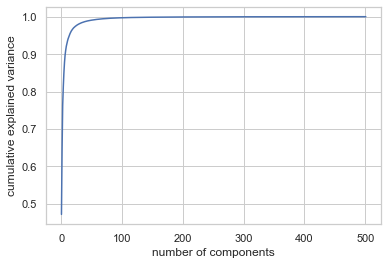

In [6]:
sns.set()
sns.set_style('whitegrid')
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [7]:
# Applying PCA for Dimension Reduction from 502 to 2 dimensions for better data visualization
pca = PCA(n_components=2)
pca.fit(X_scaled)
print('explained variance: ')
print(pca.explained_variance_)

explained variance: 
[237.01475857  86.20695296]


In [8]:
print('PCA Components:')
print(pca.components_)

PCA Components:
[[-0.0641156  -0.06100625 -0.03912755 ... -0.06222908  0.00249839
  -0.05149673]
 [ 0.01345954 -0.01783581 -0.06428133 ... -0.02036739 -0.08124665
  -0.05945237]]


In [9]:
X_transformed = pca.transform(X_scaled)
print('First 5 rows of the Transformed Feature values :')
print(X_transformed[:5,:])
print('Transformed Feature shape :')
print(X_transformed.shape)
print('Original Feature shape :')
print(X_scaled.shape)
print('Restransformed Feature shape :')
X_retransformed = pca.inverse_transform(X_transformed)
print(X_retransformed.shape)
print('First 5 rows of the Retransformed Feature values :')
print(X_retransformed[:5,:])

First 5 rows of the Transformed Feature values :
[[25.64715405  9.99154156]
 [25.74447983  9.87809253]
 [25.66169481  9.81134664]
 [25.76412613  9.97993834]
 [25.67551977  9.86346559]]
Transformed Feature shape :
(41266, 2)
Original Feature shape :
(41266, 502)
Restransformed Feature shape :
(41266, 502)
First 5 rows of the Retransformed Feature values :
[[-1.50990118 -1.74284403 -1.64577982 ... -1.7995004  -0.74770277
  -1.91476551]
 [-1.51766825 -1.74675806 -1.64229528 ... -1.80324623 -0.73824226
  -1.91303266]
 [-1.51325881 -1.74051719 -1.63476559 ... -1.79673515 -0.7330262
  -1.9048013 ]
 [-1.51755709 -1.74977311 -1.64961078 ... -1.80654313 -0.7464678
  -1.92009935]
 [-1.51344371 -1.74229018 -1.63865681 ... -1.798657   -0.73722615
  -1.90861183]]


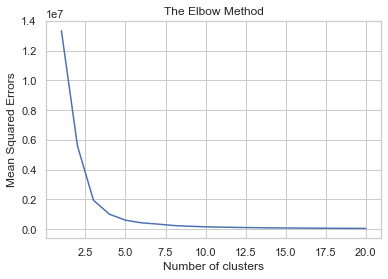

In [10]:
#Finding the optimum number of clusters for KMEANS cluster
wcss=[]
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Mean Squared Errors')
plt.show()

In [11]:
# Optimum no of clusters from the elbow method is determined to be 5
# Applying the k-means clustering to find the stocks which are similar in performance
k_means = KMeans(n_clusters=5,random_state=0,init='k-means++')
k_means.fit(X_transformed)
y_kmeans = kmeans.fit_predict(X_transformed)
labels = k_means.labels_
print("labels generated :\n",labels)

labels generated :
 [3 3 3 ... 2 2 2]


In [12]:
len(labels)

41266

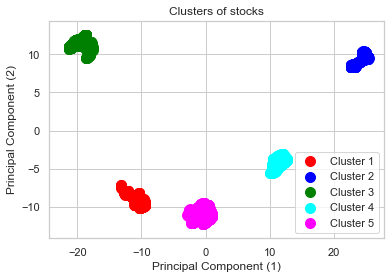

In [13]:
# visualising the clusters
plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_transformed[y_kmeans == 2, 0], X_transformed[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_transformed[y_kmeans == 3, 0], X_transformed[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_transformed[y_kmeans == 4, 0], X_transformed[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of stocks')
plt.xlabel('Principal Component (1)')
plt.ylabel('Principal Component (2)')
plt.legend()
plt.show()

In [14]:
# Problem 2
# To find out the number of Unique patterns that exist in the historical stock data set, based on fluctuations in price
df_comp = pd.DataFrame(pca.components_,columns=df.columns)
df_comp.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,-0.064116,-0.061006,-0.039128,-0.040896,-0.062662,-0.009756,-0.035746,-0.054455,0.050145,-0.035261,...,-0.049236,0.056778,-0.054394,-0.050423,0.046987,-0.057669,-0.061151,-0.062229,0.002498,-0.051497
1,0.013460,-0.017836,-0.064281,0.033885,0.001886,-0.032434,0.043464,-0.029479,0.016120,0.058259,...,-0.058924,0.030252,0.013685,-0.040764,-0.052832,0.010248,0.031474,-0.020367,-0.081247,-0.059452


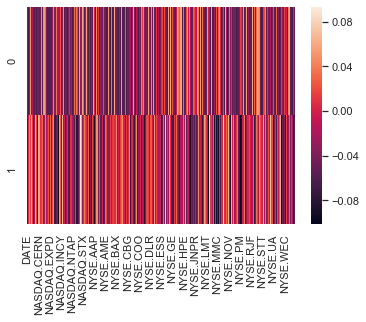

In [15]:
sns.set_style('whitegrid')
sns.heatmap(df_comp)

In [16]:
df['labels'] = labels
df['labels'].unique().tolist()

[3, 0, 4, 1, 2]

In [18]:
# Problem 3:
# Identify which all stocks are moving together and which all stocks are different from each other.
for i in df['labels'].unique().tolist():
    count = df[df['labels'] == i].shape[0]
    print('\nFor lablel {} the number of similar stock performances is : {} '.format(i,count))


For lablel 3 the number of similar stock performances is : 5872 

For lablel 0 the number of similar stock performances is : 8627 

For lablel 4 the number of similar stock performances is : 11161 

For lablel 1 the number of similar stock performances is : 5868 

For lablel 2 the number of similar stock performances is : 9738 
